In [108]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objects as go

import torch
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [49]:
data = np.genfromtxt('data/train.csv', delimiter=',')[1:]
data_for_evaluation = np.genfromtxt('data/test.csv', delimiter=',')[1:]

In [50]:
X = data[:, :3]
pressure = data[:, -1:]

In [141]:
X_train, X_test, pressure_train, pressure_test = train_test_split(X, pressure, train_size=0.3)

In [26]:
def get_coord(X: np.ndarray):
    return X[:, 0], X[:, 1], X[:, 2]

In [142]:
x_eval, y_eval, z_eval = get_coord(data_for_evaluation)
x_train, y_train, z_train = get_coord(X_train)
x_test, y_test, z_test = get_coord(X_test)

In [94]:
train_trace = go.Scatter3d(
    x=x_train,
    y=y_train,
    z=z_train,
    mode='markers',
    marker=dict(
        size=5,
        color='blue',  # Color for training points
        opacity=0.8
    ),
    name='Train'  # Legend entry for training points
)

test_trace = go.Scatter3d(
    x=x_test,
    y=y_test,
    z=z_test,
    mode='markers',
    marker=dict(
        size=5,
        color='red',  # Color for test points
        opacity=0.8
    ),
    name='Test'  # Legend entry for test points
)

eval_trace = go.Scatter3d(
    x=x_eval,
    y=y_eval,
    z=z_eval,
    mode='markers',
    marker=dict(
        size=5,
        color='green',  # Color for test points
        opacity=0.8
    ),
    name='Eval'  # Legend entry for test points
)

# Create a figure and add both the train and test traces
fig = go.Figure(data=[train_trace, test_trace, eval_trace])

# Update the layout of the figure
fig.update_layout(
    width = 800,
    height = 600,
    title='3D Scatter Plot of Train and Test Data Points',
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis',
        bgcolor='white'  # Set background color to white for better visibility
    )
)

# Show the plot
fig.show()

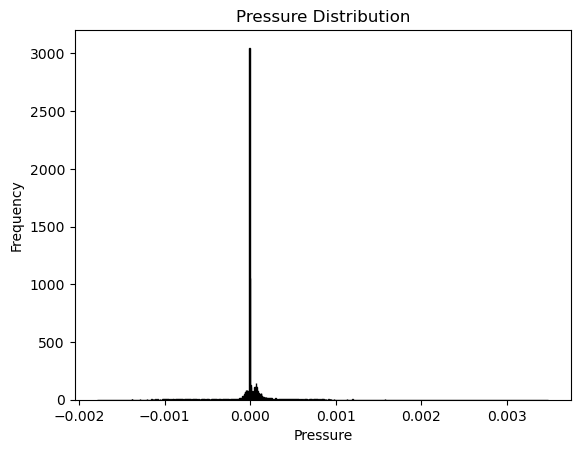

In [53]:
# Create a histogram
pressure_normalized = (pressure - np.mean(pressure))/np.var(pressure)
plt.hist(pressure_normalized, bins=1000, color='skyblue', edgecolor='black')

# plt.hist(pressure, bins=100, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Pressure Distribution')
plt.xlabel('Pressure')
plt.ylabel('Frequency')

# Show the plot
plt.show()


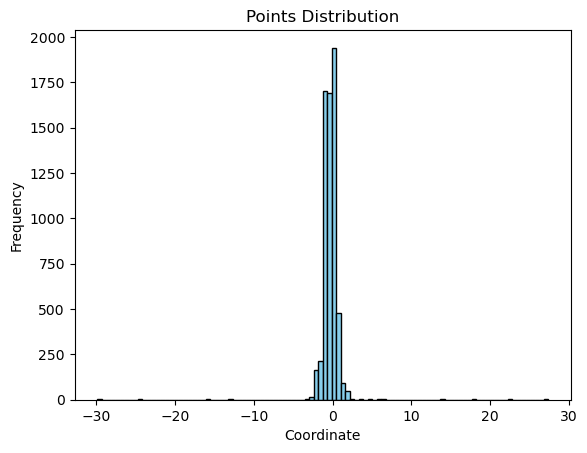

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a numpy array called 'pressure'
# pressure = np.array([0.1, 0.5, 0.3, 0.7, 0.2, 0.4, 0.6, 0.8, 0.9, 0.2])

# Create a histogram
plt.hist(y_train, bins=100, color='skyblue', edgecolor='black')

# plt.hist(pressure, bins=100, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Points Distribution')
plt.xlabel('Coordinate')
plt.ylabel('Frequency')

# Show the plot
plt.show()


x: [-20, 20] \
y: [-3, 3] \
z: [-15. 15]


In [97]:
def get_indices(x, y, z, borders_x, borders_y, borders_z):
    drops_indices = np.where( 
        (x<borders_x[0]) | (x>borders_x[1]) |  
        (y<borders_y[0]) | (y>borders_y[1]) | 
        (z<borders_z[0]) | (z>borders_z[1]))[0]
    indices = np.where(
        (x > borders_x[0]) & (x < borders_x[1]) &
        (y > borders_y[0]) & (y < borders_y[1]) &
        (z > borders_z[0]) & (z < borders_z[1])
    )[0]

    return indices, drops_indices

In [99]:
indices, drops_indices = get_indices(x_train, y_train, z_train, [-20, 20], [-3,3], [-15, 15])

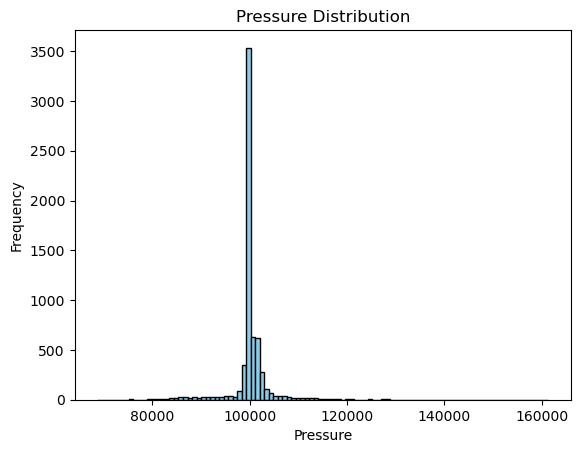

In [103]:
# Create a histogram
# pressure_normalized = (pressure[drops_indices] - np.mean(pressure[drops_indices]))/np.var(pressure[drops_indices])
plt.hist(pressure_train, bins=100, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Pressure Distribution')
plt.xlabel('Pressure')
plt.ylabel('Frequency')

# Show the plot
plt.show()


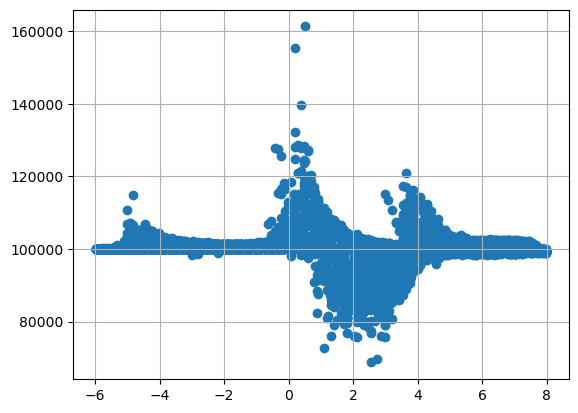

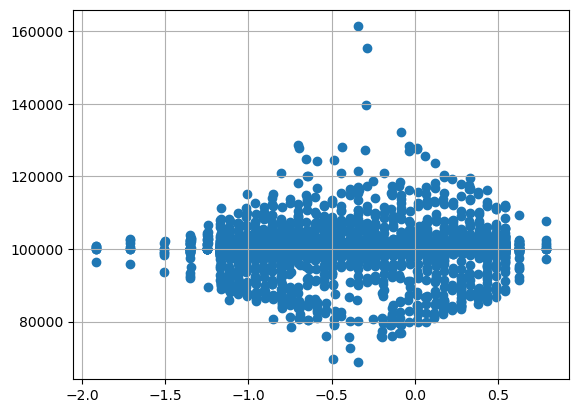

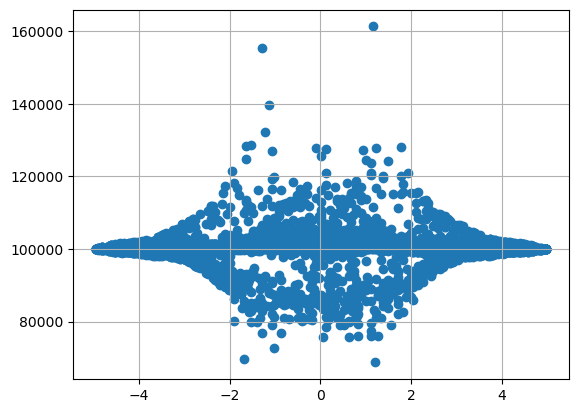

In [106]:
plt.scatter(x_train[indices], pressure_train[indices])
plt.grid()
plt.show()
plt.scatter(y_train[indices], pressure_train[indices])
plt.grid()
plt.show()
plt.scatter(z_train[indices], pressure_train[indices])

plt.grid()
plt.show()

Заметим, что значения вне промежутков неинформативны: \
x: [-6, 9] \
y: [-1.5, 0.7 ] \
z: [-5, 5] \
Изучим распределение при "неинформативных значениях"
Также при "неинформативных" значениях будем присваивать давление по умолчанию: 10000

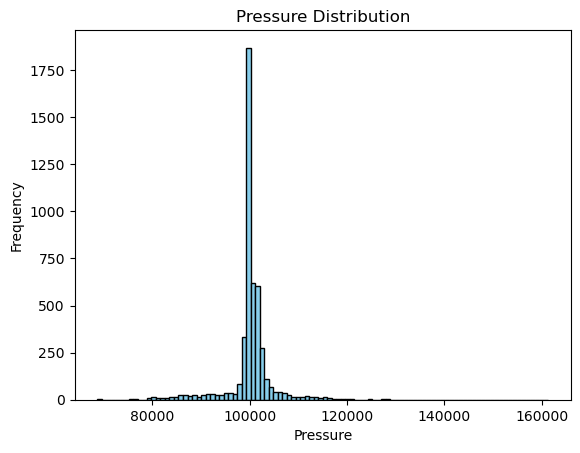

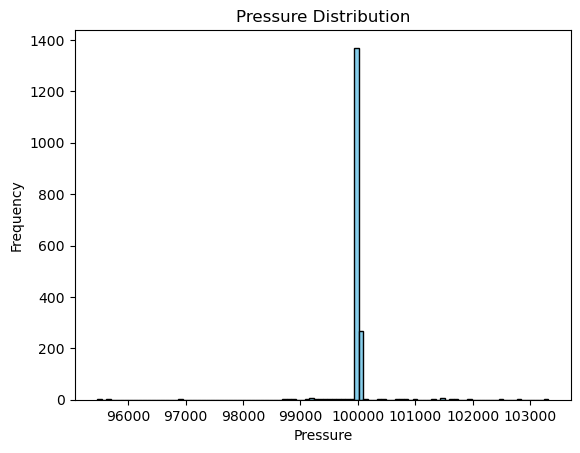

In [105]:
indices, drops_indices = get_indices(x_train, y_train, z_train, [-6, 8], [-2,1], [-5, 5])
# Create a histogram
# pressure_normalized = (pressure[drops_indices] - np.mean(pressure[drops_indices]))/np.var(pressure[drops_indices])
plt.hist(pressure_train[indices], bins=100, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Pressure Distribution')
plt.xlabel('Pressure')
plt.ylabel('Frequency')

# Show the plot
plt.show()

plt.hist(pressure_train[drops_indices], bins=100, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Pressure Distribution')
plt.xlabel('Pressure')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [125]:
pressure_train

array([[ 99999.68356765],
       [100028.145844  ],
       [100021.21867838],
       ...,
       [100030.34844575],
       [100963.77869234],
       [100269.38522639]])

In [126]:
reg = GradientBoostingRegressor(random_state=0, loss='absolute_error')
reg.fit(X_train[indices],pressure_train[indices])
print('Train: ', mean_absolute_error(pressure_train[indices], reg.predict(X_train[indices])))
indices_test, drops_indices_test = get_indices(x_test, y_test, z_test, [-6, 8], [-2,1], [-5, 5])
print('Test: ', mean_absolute_error(pressure_test[indices_test], reg.predict(X_test[indices_test])))

/home/andrey/.conda/envs/MIPT_DL_course/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Train:  2006.4907101169563
Test:  1867.1952593333374


In [151]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [152]:
model_arr = [
    GradientBoostingRegressor(random_state=0, loss='absolute_error'),
    KNeighborsRegressor(n_neighbors=5),
    RandomForestRegressor(),
]
for model in model_arr:
    eval(model)

/home/andrey/.conda/envs/MIPT_DL_course/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingRegressor
Train:  1715.4947334978287
Test:  1579.3692327913209
KNeighborsRegressor
Train:  517.1566007456432
Test:  652.3682718799654


/tmp/ipykernel_44468/1591609466.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor
Train:  246.63701314091543
Test:  625.3473126850106


/home/andrey/.conda/envs/MIPT_DL_course/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR
Train:  1822.2153941734914
Test:  1681.1345503936407


In [145]:
def eval(reg):
    reg.fit(X_train,pressure_train)
    print(reg.__class__.__name__)
    print('Train: ', mean_absolute_error(pressure_train, reg.predict(X_train)))
    # indices_test, drops_indices_test = get_indices(x_test, y_test, z_test, [-6, 8], [-2,1], [-5, 5])
    print('Test: ', mean_absolute_error(pressure_test, reg.predict(X_test)))

In [130]:
reg = GradientBoostingRegressor(random_state=0, loss='absolute_error')
reg.fit(X_train,pressure_train)
print('Train: ', mean_absolute_error(pressure_train, reg.predict(X_train)))
# indices_test, drops_indices_test = get_indices(x_test, y_test, z_test, [-6, 8], [-2,1], [-5, 5])
print('Test: ', mean_absolute_error(pressure_test, reg.predict(X_test)))

/home/andrey/.conda/envs/MIPT_DL_course/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Train:  1654.0066366895392
Test:  1528.1560653880883


In [128]:
def predict(X, reg):
    x, y, z = get_coord(X)
    indices, drops_indices = get_indices(x, y, z, [-6, 8], [-2,1], [-5, 5])
    num_of_samples = X.shape[0]
    print(num_of_samples)
    y = np.ones(num_of_samples)
    y[indices] = reg.predict(X[indices])
    y[drops_indices] = 100000

    return y

In [136]:
reg = GradientBoostingRegressor(random_state=0, loss='absolute_error')
# reg
indices, drops_indices = get_indices(x_train, y_train, z_train, [-6, 8], [-2,1], [-5, 5])
reg.fit(X_train[indices],pressure[indices])

print('Train: ', mean_absolute_error(pressure_train, predict(X_train, reg)))
print('Test: ', mean_absolute_error(pressure_test, predict(X_test, reg)))


/home/andrey/.conda/envs/MIPT_DL_course/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



6399
Train:  1769.3584418273315
2133
Test:  1644.8196074986545


In [120]:
data_for_evaluation

array([[12.59538897, -0.67647908,  9.44801669],
       [-5.11598518,  0.33254562, -1.9525669 ],
       [-2.18280931, -0.13315801,  4.46346299],
       ...,
       [-3.92777576, -1.16594442,  0.22051353],
       [ 1.30678974, -0.90933085,  3.74584222],
       [ 2.66853971,  0.43602373, -3.00577261]])

In [153]:
reg =     RandomForestRegressor()
reg.fit(X,pressure)

ans = reg.predict(data_for_evaluation)

/tmp/ipykernel_44468/3384415588.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [132]:
np.savetxt('answer.csv', ans, delimiter=',')